In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 23 14:49:13 2025

@author: guyadern
"""

import matplotlib.pyplot as plt
import numpy as np
#essa linha é so para quando a gente for chamar np.fft.fft eu irei escrever fft(como um using namespace em C)
from numpy.fft import fft, ifft, fftshift

In [14]:
N=100; fo=50; Fe=1000; Te=1/Fe;
k=np.arange(0,N,1) # N nao esta incluso na lista, ela vai de 0 a N-1
t=Te*k;
x_k=np.sin(2*np.pi*fo*t);

#% on crée un axe des temps 'continu'
tc=Te*np.arange(0,N,Te) # aqui a gente finge que esta no continuo para tracar o sinal
xc=np.sin(2*np.pi*fo*tc)

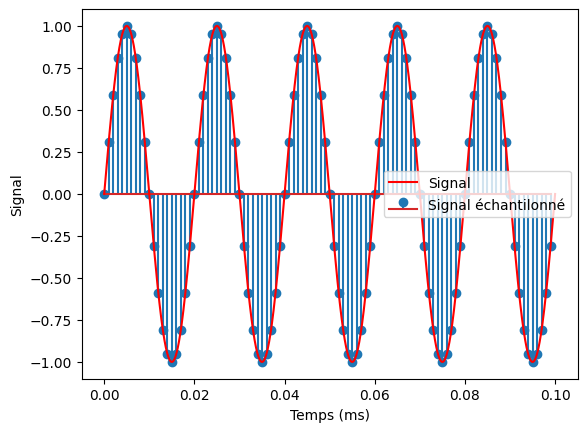

In [15]:
# Une façon de visualiser le signal et le signal échantillonné en tenant compte du temps en secondes
plt.figure();
plt.stem(t,x_k,label='Signal échantilonné');
plt.plot(tc,xc,'r',label='Signal')
plt.xlabel('Temps (ms)');plt.ylabel('Signal')
plt.legend()

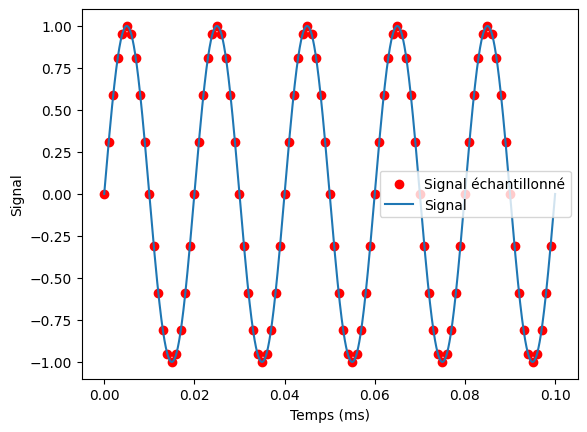

In [16]:
# Une seconde façon de visualiser le signal
plt.figure()
plt.scatter(t,x_k,c='r',label='Signal échantillonné')
plt.plot(tc,xc,label='Signal');
plt.xlabel('Temps (ms)');plt.ylabel('Signal')
plt.legend()


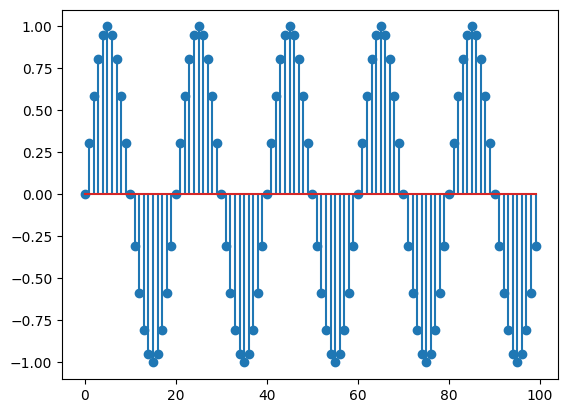

In [17]:
# Visualisation en fonction des échantillons 
plt.figure()
plt.stem(k,x_k,label='Signal échantilonné');

In [18]:
# On calule la TF
X_f=fft(x_k);
#Ici: comment creer le axe de fequence
# axe des fréquences réduites 
x_f=np.arange(0,1,1/N);
# axe des fréquences
freq=x_f*Fe;

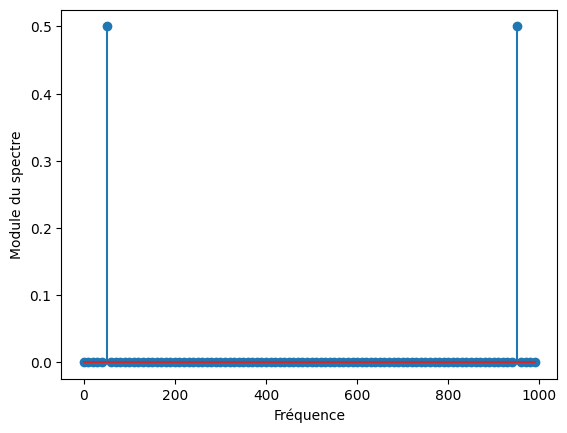

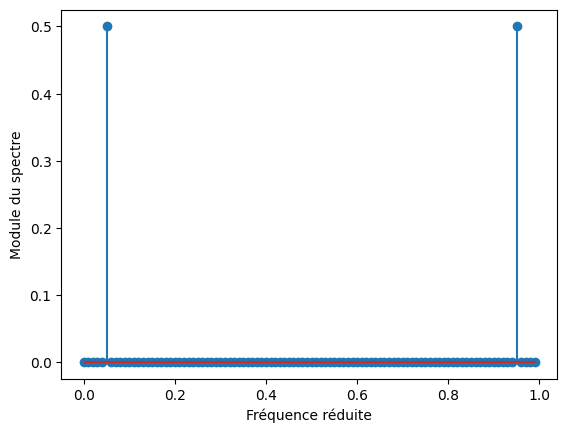

In [19]:
plt.figure()
#é melhor usar stem para tf
plt.stem(freq,np.abs(X_f)/N);
plt.xlabel('Fréquence'); plt.ylabel('Module du spectre');

plt.figure()
plt.stem(x_f,np.abs(X_f)/N); #divide a amplitude por N
#Esta na formula da DFT
plt.xlabel('Fréquence réduite'); plt.ylabel('Module du spectre');


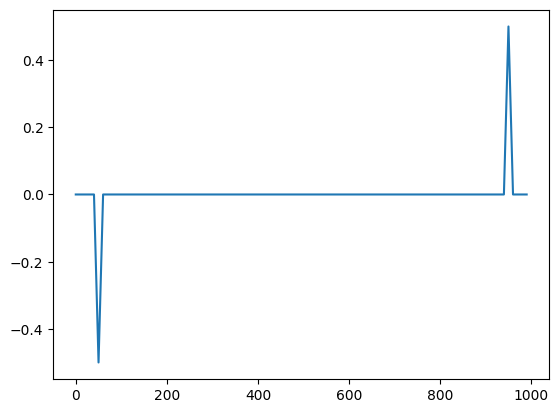

In [20]:
# si on souhaite visualiser la partie imaginaire
plt.figure()
plt.plot(freq,np.imag(X_f)/N)

In [21]:
#%% On va représenter la TF centrée sur 0
# Fft shift é para representar centrada em zero, ver tanto -fe/2 como +fe/2 (ver proximo grafico)
X_fc=fftshift(X_f)
x_fc=np.arange(-1/2,1/2,1/N)
freqc=x_fc*Fe;

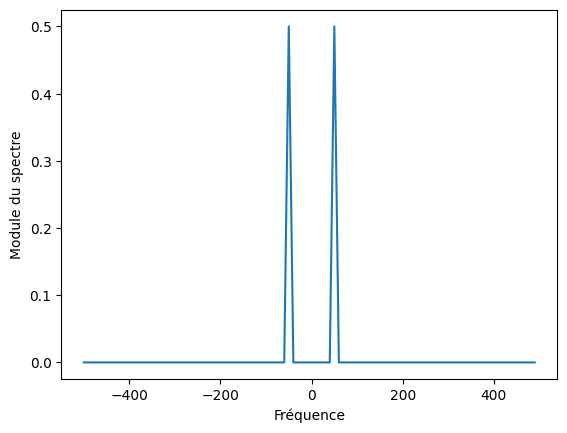

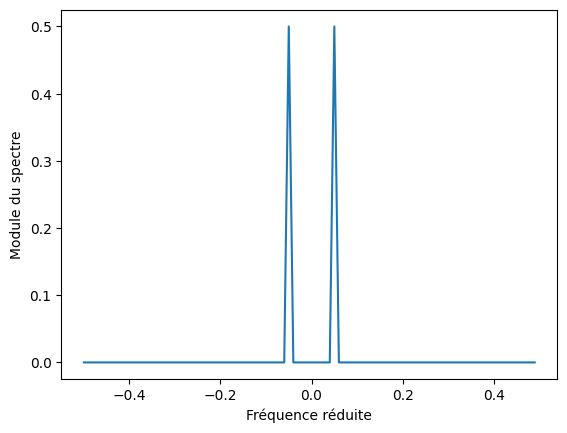

In [24]:
plt.figure()
plt.plot(freqc,np.abs(X_fc)/N);
plt.xlabel('Fréquence'); plt.ylabel('Module du spectre');

plt.figure()
plt.plot(x_fc,np.abs(X_fc)/N);
plt.xlabel('Fréquence réduite'); plt.ylabel('Module du spectre');


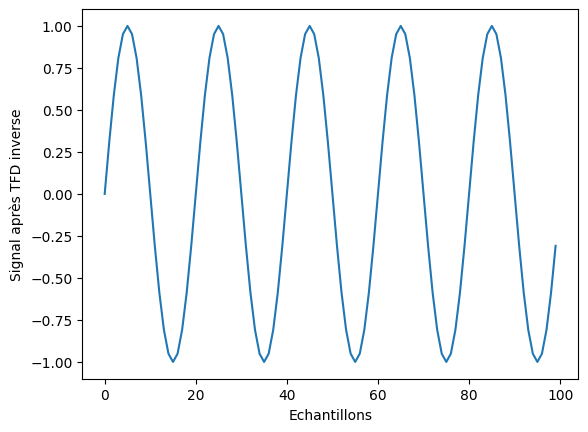

In [23]:
#%% TFD inverse
x_k2=ifft(X_f);
plt.figure()
plt.plot(k,np.real(x_k2));
plt.xlabel('Echantillons'); plt.ylabel('Signal après TFD inverse');
